In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('it_salary.csv')

In [5]:
df.head(10)

,level,yrs_exp,company_size,company_type,salary
0,Senior,13.0,50-100,Startup,64000
1,Middle,4.0,more than 1000,Startup,70000
2,Senior,6.0,100-1000,Product,63000
3,Senior,10.0,50-100,Product,66000
4,Middle,11.0,more than 1000,Product,80000
5,Senior,12.0,50-100,Startup,85000
6,Head,15.0,100-1000,Product,81000
7,Head,8.0,100-1000,Product,66000
8,Senior,7.0,100-1000,Product,65000
9,Senior,8.0,100-1000,Product,65000


In [6]:
 df.shape

(1492, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level         1492 non-null   object 
 1   yrs_exp       1492 non-null   float64
 2   company_size  1492 non-null   object 
 3   company_type  1492 non-null   object 
 4   salary        1492 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 58.4+ KB


In [8]:
df.isnull().sum()

level           0
yrs_exp         0
company_size    0
company_type    0
salary          0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yrs_exp,1492.0,8.766421,4.929540,0.0,5.0,8.0,11.0,38.0
salary,1492.0,72238.128686,23152.738753,6000.0,60000.0,69000.0,80000.0,216000.0


In [10]:
df.level.value_counts()

Senior    948
Middle    412
Junior     85
Head       47
Name: level, dtype: int64

In [11]:
df.company_size.value_counts()

100-1000          623
more than 1000    550
50-100            256
less than 50       63
Name: company_size, dtype: int64

In [12]:
df.company_type.value_counts()

Product        998
Startup        239
Agency         228
Corporation     27
Name: company_type, dtype: int64

In [13]:
df[df['salary'] == df.salary.max()]

,level,yrs_exp,company_size,company_type,salary
438,Senior,12.0,100-1000,Product,216000


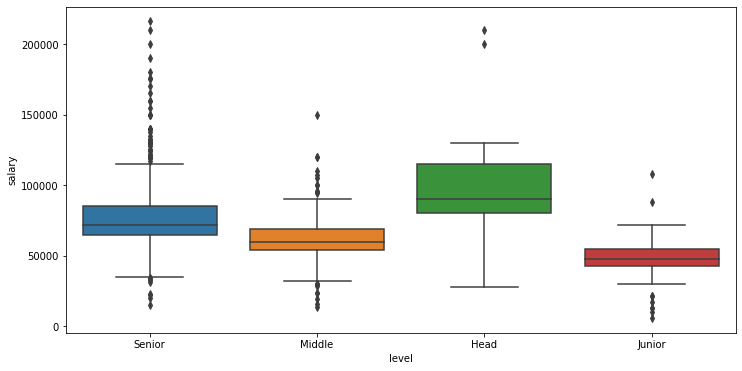

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.level, y=df.salary)

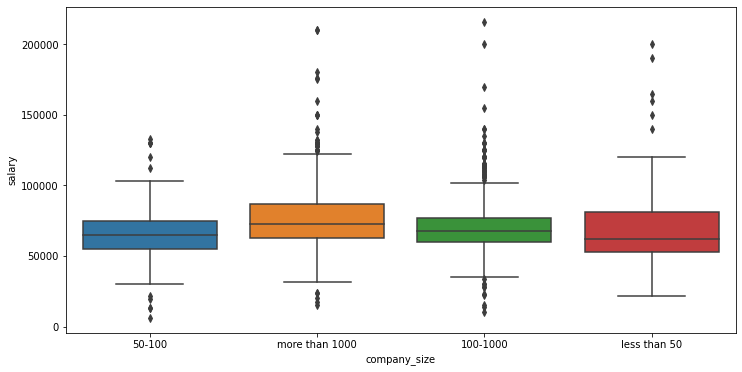

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.company_size, y=df.salary)

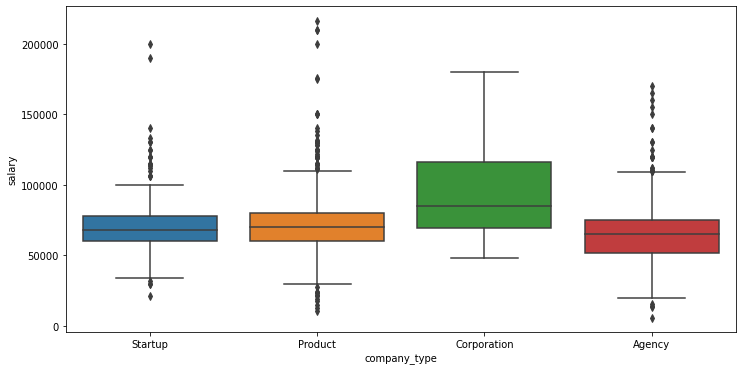

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.company_type, y=df.salary)

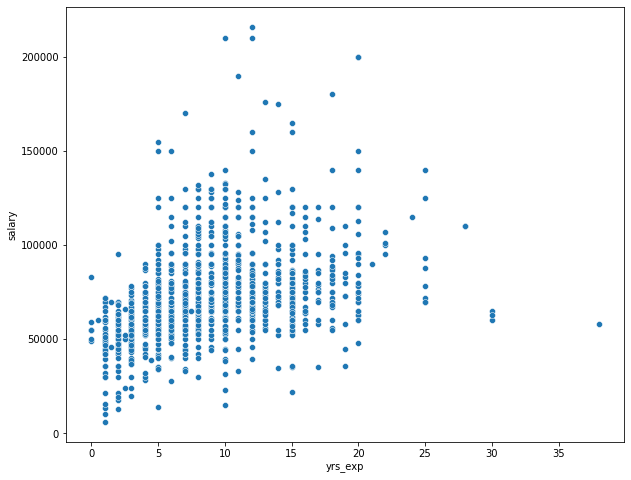

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'yrs_exp', y = 'salary', data = df)

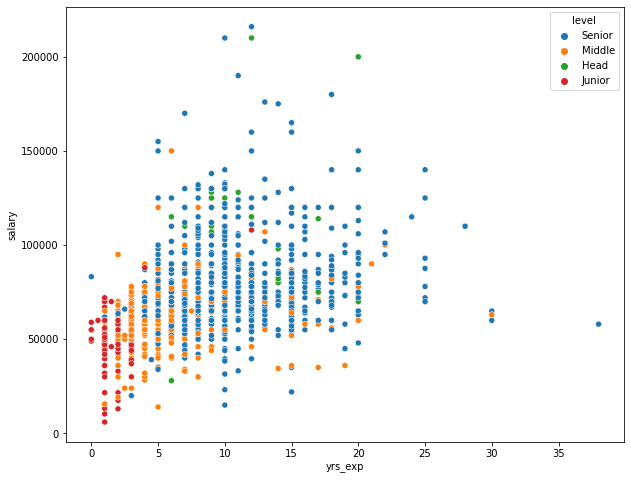

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'yrs_exp', y = 'salary', hue = 'level', data = df)

In [19]:
data = df.copy()

In [20]:
ndata = pd.get_dummies(data, prefix_sep='_')

In [21]:
ndata.head()

,yrs_exp,salary,level_Head,level_Junior,level_Middle,level_Senior,company_size_100-1000,company_size_50-100,company_size_less than 50,company_size_more than 1000,company_type_Agency,company_type_Corporation,company_type_Product,company_type_Startup
0,13.0,64000,0,0,0,1,0,1,0,0,0,0,0,1
1,4.0,70000,0,0,1,0,0,0,0,1,0,0,0,1
2,6.0,63000,0,0,0,1,1,0,0,0,0,0,1,0
3,10.0,66000,0,0,0,1,0,1,0,0,0,0,1,0
4,11.0,80000,0,0,1,0,0,0,0,1,0,0,1,0


In [23]:
ndata.shape

(1492, 14)

In [22]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   yrs_exp                      1492 non-null   float64
 1   salary                       1492 non-null   int64  
 2   level_Head                   1492 non-null   uint8  
 3   level_Junior                 1492 non-null   uint8  
 4   level_Middle                 1492 non-null   uint8  
 5   level_Senior                 1492 non-null   uint8  
 6   company_size_100-1000        1492 non-null   uint8  
 7   company_size_50-100          1492 non-null   uint8  
 8   company_size_less than 50    1492 non-null   uint8  
 9   company_size_more than 1000  1492 non-null   uint8  
 10  company_type_Agency          1492 non-null   uint8  
 11  company_type_Corporation     1492 non-null   uint8  
 12  company_type_Product         1492 non-null   uint8  
 13  company_type_Start

In [24]:
ndata = ndata.drop(['level_Junior','company_size_less than 50','company_type_Corporation'], axis='columns')

In [25]:
ndata.shape

(1492, 11)

In [27]:
ndata.head()

,yrs_exp,salary,level_Head,level_Middle,level_Senior,company_size_100-1000,company_size_50-100,company_size_more than 1000,company_type_Agency,company_type_Product,company_type_Startup
0,13.0,64000,0,0,1,0,1,0,0,0,1
1,4.0,70000,0,1,0,0,0,1,0,0,1
2,6.0,63000,0,0,1,1,0,0,0,1,0
3,10.0,66000,0,0,1,0,1,0,0,1,0
4,11.0,80000,0,1,0,0,0,1,0,1,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error

In [29]:
X = ndata.drop('salary',axis=1)
y = ndata.salary

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print("Linear Regression R^2 Score: {:.4f}%".format(lr.score(X_test, y_test)*100))

Linear Regression R^2 Score: 37.7919%


In [37]:
y_pred = lr.predict(X_test)

In [38]:
print("Linear Regression RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Linear Regression RMSE: 15736.1458


In [39]:
diff = y_test - y_pred
pd.DataFrame(np.c_[y_test , y_pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,45000.0,60709.126333,-15709.126333
1,48000.0,41766.638307,6233.361693
2,87000.0,74095.313246,12904.686754
3,50000.0,50783.618260,-783.618260
4,48000.0,58759.874828,-10759.874828
...,...,...,...
219,65000.0,52608.976082,12391.023918
220,70000.0,63187.563248,6812.436752
221,65000.0,65618.794433,-618.794433
222,70000.0,79979.607098,-9979.607098


In [40]:
X_train.iloc[792]

yrs_exp                        2.0
level_Head                     0.0
level_Middle                   1.0
level_Senior                   0.0
company_size_100-1000          1.0
company_size_50-100            0.0
company_size_more than 1000    0.0
company_type_Agency            1.0
company_type_Product           0.0
company_type_Startup           0.0
Name: 294, dtype: float64

In [42]:
y_train.iloc[792]

42000

In [48]:
value = lr.predict([[2,0,1,0,1,0,0,1,0,0]])[0]
print(value)

54539.82515595127


In [47]:
import pickle
with open('lr_model.pickle','wb') as f:
  pickle.dump(lr,f)